In [1]:

import pandas as pd
from pathlib import Path
import json
dataset_path = Path("/mnt/i/bio/mave_curation/Erwood_NPC1_HEK293T/")
assert dataset_path.exists()

In [2]:
data = pd.read_excel(dataset_path / 'raw' / '41587_2021_1201_MOESM3_ESM.xlsx', sheet_name='Supplementary Table 1',header=1)

In [3]:
data

,Protein Annotation,Wild type Base,Edited Base,CDS,Consequence,SPE Classification,Function Score,id,start,end,reference_base,alternate_base,refseq_id,Clinvar_SIG,CADD_phred,Unadjusted Function Score
0,L1027L,T,A,3081,synonymous,Functional,0.954726,chr18-23536836-23536837-A-T,23536836,23536837,A,T,NPC1:NM_000271:exon21:c.T3081A:p.L1027L:Select,NaN,NaN,0.188709
1,L1027L,T,C,3081,synonymous,Functional,0.999139,chr18-23536836-23536837-A-G,23536836,23536837,A,G,NPC1:NM_000271:exon21:c.T3081C:p.L1027L:Select,NaN,NaN,0.008803
2,L1027L,T,G,3081,synonymous,Functional,0.963492,chr18-23536836-23536837-A-C,23536836,23536837,A,C,NPC1:NM_000271:exon21:c.T3081G:p.L1027L:Select,NaN,NaN,0.145510
3,G1028S,G,A,3082,missense,Functional,0.936084,chr18-23536835-23536836-C-T,23536835,23536836,C,T,NPC1:NM_000271:exon21:c.G3082A:p.G1028S:Select,NaN,NaN,0.260211
4,G1028R,G,C,3082,missense,Functional,0.953889,chr18-23536835-23536836-C-G,23536835,23536836,C,G,NPC1:NM_000271:exon21:c.G3082C:p.G1028R:Select,NaN,11.22,0.191542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,L919L,G,C,2757,synonymous,Functional,1.008759,chr18-23539848-23539849-C-G,23539848,23539849,C,G,NPC1:NM_000271:exon18:c.G2757C:p.L919L:Select,NaN,NaN,-0.031451
974,L919L,G,T,2757,synonymous,Functional,1.005450,chr18-23539848-23539849-C-A,23539848,23539849,C,A,NPC1:NM_000271:exon18:c.G2757T:p.L919L:Select,NaN,NaN,-0.023142
975,V920M,G,A,2758,missense,Deleterious,-0.010638,chr18-23539847-23539848-C-T,23539847,23539848,C,T,NPC1:NM_000271:exon18:c.G2758A:p.V920M:Select,NaN,27.10,3.304521
976,V920L,G,C,2758,missense,Deleterious,0.480805,chr18-23539847-23539848-C-G,23539847,23539848,C,G,NPC1:NM_000271:exon18:c.G2758C:p.V920L:Select,NaN,22.70,1.693627


In [19]:
scoreset = pd.DataFrame.from_records(list(data.groupby("Protein Annotation")['Function Score'].agg('mean').items()),columns=['variant','score'])

In [20]:
from Bio.PDB.Polypeptide import protein_letters_3to1
protein_letters_1to3 = {v:k.title() for k,v in protein_letters_3to1.items()}
def clean(s):
    hgvs_pro = protein_letters_1to3[s[0]] + s[1:-1]
    if s[-1] == "*":
        hgvs_pro += "Ter"
    else:
        hgvs_pro += protein_letters_1to3[s[-1]]
    return "p."+ hgvs_pro

In [21]:
scoreset = scoreset.assign(hgvs_pro=scoreset.variant.apply(clean))

In [22]:
scoreset

,variant,score,hgvs_pro
0,A1017A,0.983629,p.Ala1017Ala
1,A1017D,0.107268,p.Ala1017Asp
2,A1017G,0.889456,p.Ala1017Gly
3,A1017P,0.902140,p.Ala1017Pro
4,A1017S,0.857108,p.Ala1017Ser
...,...,...,...
764,Y946F,1.028224,p.Tyr946Phe
765,Y946H,0.150414,p.Tyr946His
766,Y946N,-0.453831,p.Tyr946Asn
767,Y946S,-0.074816,p.Tyr946Ser


In [23]:
scoreset.to_csv(dataset_path / 'scoreset.csv',index=False)

<Axes: >

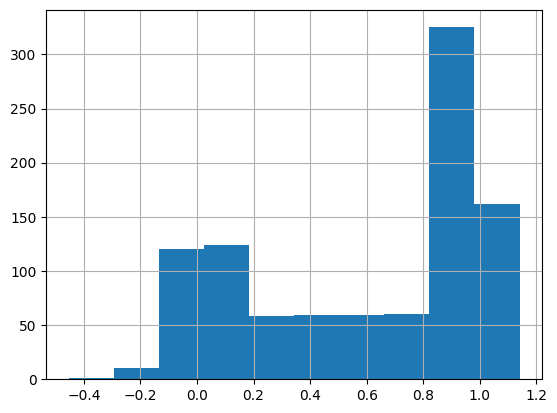

In [8]:
data.loc[:,'Function Score'].hist()

In [24]:
metadata = dict(uniprot_acc='O15118')
with open(dataset_path / 'metadata.json','w') as f:
    json.dump(metadata,f)